# US Flight Delay Analysis - Winter Season (2018-2019)
This notebook contains the analysis of the "On-Time : Reporting Carrier On-Time Performance" dataset, for: December 2018, January 2019 and February 2019.

In terms of technology, we will use pandas for the data manipulation and analysis.

Each phase of the process followed is indicated by cronological order.

### Imports:

In [84]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os

#Visualitzation
import matplotlib.pyplot as plt
import seaborn as sbn

# 01. Data Loading

In [85]:
#Winter Season dataset
df = pd.read_csv('C:\\Users\\GerardEspejo\\Desktop\\TFM\\Data\\Winter_Season2.csv')
df.sample(5)

,Unnamed: 0,Year,Quarter,Month,DayOfMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,RegistrationNum,...,CRSElapsedTimeMin,ActualElapsedTimeMin,FlightTimeMin,NumberOfFlights,DistanceMil,Distance_Int250Mil,DepTime2,ArrTime2,DepDateTime,ArrDateTime
710058,710058,2019,1,1,1,2,2019-01-01,AA,AA,N4005X,...,62.0,51.0,34.0,1.0,237.0,1,12:18,13:09,2019-01-01 12:18:00,2019-01-01 13:09:00
624147,624147,2019,1,1,23,3,2019-01-23,AA,AA,N929AN,...,314.0,292.0,274.0,1.0,1972.0,8,14:02,16:54,2019-01-23 14:02:00,2019-01-23 16:54:00
182076,182076,2018,4,12,1,6,2018-12-01,OO,OO,N257SY,...,88.0,81.0,61.0,1.0,422.0,2,17:07,19:28,2018-12-01 17:07:00,2018-12-01 19:28:00
815555,815555,2019,1,1,10,4,2019-01-10,B6,B6,N655JB,...,82.0,77.0,57.0,1.0,353.0,2,09:15,10:32,2019-01-10 09:15:00,2019-01-10 10:32:00
89684,89684,2018,4,12,31,1,2018-12-31,B6,B6,N184JB,...,80.0,62.0,51.0,1.0,264.0,2,09:34,10:36,2018-12-31 09:34:00,2018-12-31 10:36:00


# 02. Data Examination

## Initial Exploratory

In [8]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime'],
      dtype='object')

In [9]:
df.dtypes

Unnamed: 0                  int64
Year                        int64
Quarter                     int64
Month                       int64
DayOfMonth                  int64
DayOfWeek                   int64
FlightDate                 object
UniqueCarrier              object
Carrier                    object
RegistrationNum            object
FlightNum                   int64
OriginAirport_IDNum         int64
OriginCityMarket_IDNum      int64
Origin_IATA                object
OriginCityName             object
OriginState_ID             object
OriginStateName            object
OriginWAC                   int64
DestAirport_IDNum           int64
DestCityMarket_IDNum        int64
Dest_IATA                  object
DestCityName               object
DestState_ID               object
DestStateName              object
DestWAC                     int64
CRSDepTime                  int64
DepTime                   float64
DepDelayMin               float64
DepDelayMin0              float64
DepDelay_Ind15

In [10]:
#Let's check the top 10 most delayed flights on Arrival
top10 = df[['FlightDate', 'Carrier', 'FlightNum','Origin_IATA', 'OriginCityName', 'Dest_IATA',
            'DestCityName','DepDelayMin','ArrDelayMin']]
top10.sort_values(by='ArrDelayMin', ascending=False).head(10)

,FlightDate,Carrier,FlightNum,Origin_IATA,OriginCityName,Dest_IATA,DestCityName,DepDelayMin,ArrDelayMin
1373806,2019-02-17,MQ,3888,DTW,"Detroit, MI",LGA,"New York, NY",2672.0,2649.0
1387138,2019-02-08,YV,5813,SBP,"San Luis Obispo, CA",PHX,"Phoenix, AZ",2209.0,2206.0
185738,2018-12-09,OO,3855,TRI,"Bristol/Johnson City/Kingsport, TN",ATL,"Atlanta, GA",2098.0,2108.0
1373489,2019-02-07,MQ,3879,SUX,"Sioux City, IA",ORD,"Chicago, IL",2064.0,2050.0
148950,2018-12-27,YV,6045,CMH,"Columbus, OH",IAH,"Houston, TX",1789.0,1767.0
1368248,2019-02-08,MQ,3667,CMI,"Champaign/Urbana, IL",DFW,"Dallas/Fort Worth, TX",1674.0,1652.0
688020,2019-01-05,AA,2363,FAT,"Fresno, CA",DFW,"Dallas/Fort Worth, TX",1651.0,1638.0
606110,2019-01-25,AA,511,BUF,"Buffalo, NY",DFW,"Dallas/Fort Worth, TX",1637.0,1609.0
1600096,2019-02-24,EV,4176,CVG,"Cincinnati, OH",EWR,"Newark, NJ",1603.0,1594.0
1251706,2019-02-14,AA,560,SEA,"Seattle, WA",CLT,"Charlotte, NC",1594.0,1587.0


In [11]:
df[['DepDelayMin', 'ArrDelayMin']].describe()

,DepDelayMin,ArrDelayMin
count,1.673294e+06,1.668014e+06
mean,1.060557e+01,5.321637e+00
std,4.855219e+01,5.097335e+01
min,-7.200000e+01,-1.170000e+02
25%,-6.000000e+00,-1.500000e+01
50%,-2.000000e+00,-6.000000e+00
75%,7.000000e+00,9.000000e+00
max,2.672000e+03,2.649000e+03


##### Correlation Matrix

In [12]:
df.corr()

,Unnamed: 0,Year,Quarter,Month,DayOfMonth,DayOfWeek,FlightNum,OriginAirport_IDNum,OriginCityMarket_IDNum,OriginWAC,...,ArrDelay_Ind15,ArrDelayGroup_Int15,Cancelled,Diverted,CRSElapsedTimeMin,ActualElapsedTimeMin,FlightTimeMin,NumberOfFlights,DistanceMil,Distance_Int250Mil
Unnamed: 0,1.000000,0.824524,-0.824524,-0.785204,-0.075982,-0.041196,-0.011318,0.000872,0.007732,0.004698,...,0.044486,0.049908,0.043868,0.007442,0.005173,0.013378,0.005001,NaN,-0.002646,-0.003004
Year,0.824524,1.000000,-1.000000,-0.996770,-0.039998,-0.047751,-0.035760,-0.001444,-0.000359,0.002918,...,0.026343,0.030766,0.055229,0.003052,-0.002523,0.002928,-0.002740,NaN,-0.009223,-0.009493
Quarter,-0.824524,-1.000000,1.000000,0.996770,0.039998,0.047751,0.035760,0.001444,0.000359,-0.002918,...,-0.026343,-0.030766,-0.055229,-0.003052,0.002523,-0.002928,0.002740,NaN,0.009223,0.009493
Month,-0.785204,-0.996770,0.996770,1.000000,0.035237,0.048734,0.035188,0.001417,0.000361,-0.003014,...,-0.022605,-0.027137,-0.055057,-0.002526,0.002468,-0.002530,0.003000,NaN,0.009098,0.009367
DayOfMonth,-0.075982,-0.039998,0.039998,0.035237,1.000000,-0.027279,0.025206,0.000583,0.001190,0.002487,...,0.055176,0.058060,0.052615,0.003699,0.008935,0.014132,0.011903,NaN,0.007266,0.007189
DayOfWeek,-0.041196,-0.047751,0.047751,0.048734,-0.027279,1.000000,0.065533,0.004175,0.003905,0.001113,...,0.007944,0.003883,-0.008014,0.000955,0.014173,0.013255,0.015725,NaN,0.017106,0.017144
FlightNum,-0.011318,-0.035760,0.035760,0.035188,0.025206,0.065533,1.000000,-0.049647,0.004631,0.025100,...,0.033620,0.038540,0.051217,0.010539,-0.306115,-0.299335,-0.322894,NaN,-0.343563,-0.340548
OriginAirport_IDNum,0.000872,-0.001444,0.001444,0.001417,0.000583,0.004175,-0.049647,1.000000,0.630043,0.257806,...,0.008998,0.008484,0.006770,-0.000391,0.059759,0.064697,0.064044,NaN,0.092742,0.096656
OriginCityMarket_IDNum,0.007732,-0.000359,0.000359,0.000361,0.001190,0.003905,0.004631,0.630043,1.000000,0.073980,...,-0.012093,-0.010502,-0.006653,-0.000181,0.014816,0.015437,0.014482,NaN,0.022502,0.024164
OriginWAC,0.004698,0.002918,-0.002918,-0.003014,0.002487,0.001113,0.025100,0.257806,0.073980,1.000000,...,-0.008706,-0.003217,-0.013939,0.000211,-0.034503,-0.033746,-0.024247,NaN,0.053657,0.055942


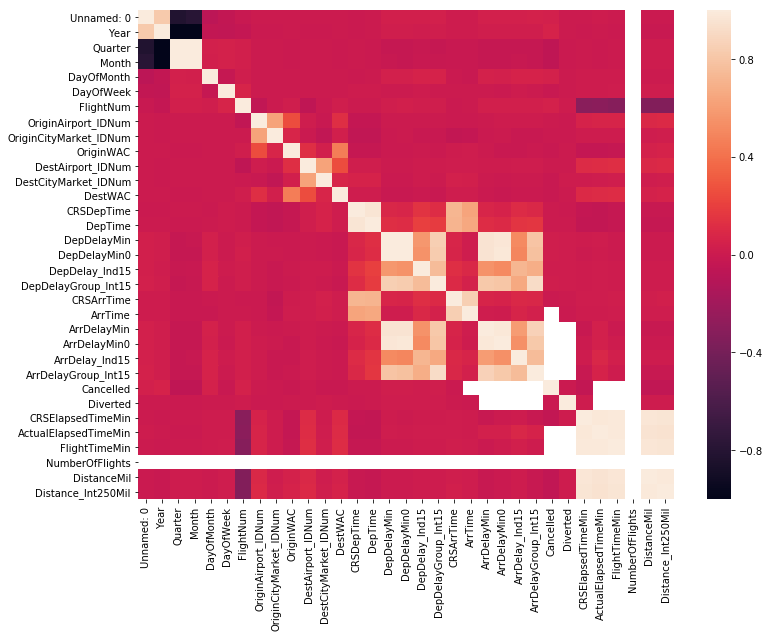

In [13]:
correlation = df.corr()
plt.subplots(figsize=(12,9))
heatmap_correlation = sbn.heatmap(correlation)
plt.show()

In [170]:
df2 = df[['Origin_IATA', 'Dest_IATA', 'DepDelayMin', 'DepDelayMin0',
       'ArrDelayMin', 'ArrDelayMin0', 'Cancelled', 'Diverted']]
df2.corr()

,DepDelayMin,DepDelayMin0,ArrDelayMin,ArrDelayMin0,Cancelled,Diverted
DepDelayMin,1.000000,0.997174,0.959005,0.973199,0.025918,0.019273
DepDelayMin0,0.997174,1.000000,0.956514,0.977055,0.025771,0.018710
ArrDelayMin,0.959005,0.956514,1.000000,0.981380,NaN,NaN
ArrDelayMin0,0.973199,0.977055,0.981380,1.000000,NaN,NaN
Cancelled,0.025918,0.025771,NaN,NaN,1.000000,-0.007599
Diverted,0.019273,0.018710,NaN,NaN,-0.007599,1.000000


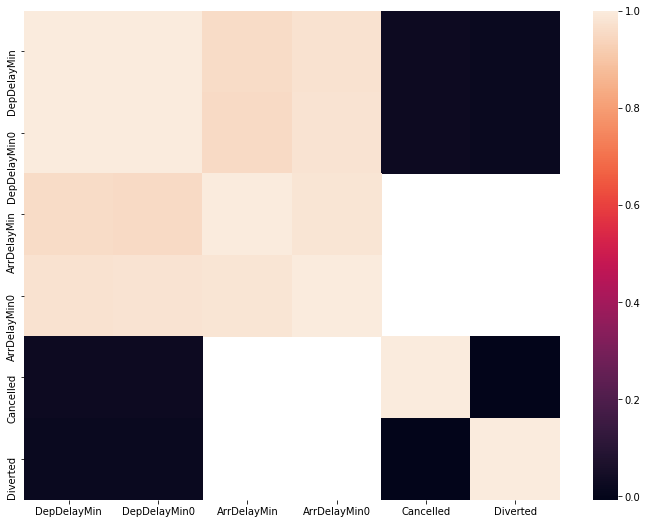

In [171]:
correlation2 = df2.corr()
plt.subplots(figsize=(12,9))
heatmap_correlation = sbn.heatmap(correlation2)
plt.show()

Conclusion: The propagated delay concept is shown as a high value of correlation between Arrival and Departures delays: 0.959005. That indicates that there is 95.90% of provability that if a flight has a delayed arrival the next flight departure will be delayed. These margin of 0.41 could be  attributable to the recovered on-flight delay time.

##### Relation between Departure and Arrival Delay

In [91]:
description = df[['DepDelayMin','ArrDelayMin','DepDelayMin0','ArrDelayMin0']].describe()
description

,DepDelayMin,ArrDelayMin,DepDelayMin0,ArrDelayMin0
count,1.673294e+06,1.668014e+06,1.673294e+06,1.668014e+06
mean,1.060557e+01,5.321637e+00,1.386509e+01,1.423746e+01
std,4.855219e+01,5.097335e+01,4.746279e+01,4.734297e+01
min,-7.200000e+01,-1.170000e+02,0.000000e+00,0.000000e+00
25%,-6.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00
50%,-2.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00
75%,7.000000e+00,9.000000e+00,7.000000e+00,9.000000e+00
max,2.672000e+03,2.649000e+03,2.672000e+03,2.649000e+03


In [92]:
description.dtypes

DepDelayMin     float64
ArrDelayMin     float64
DepDelayMin0    float64
ArrDelayMin0    float64
dtype: object

As the describe() method returns the calculated parameters as float, we will change it to a more suitable format (object) which will make it easier to compare the diferrent parameters.

In [173]:
depdelay = df['DepDelayMin'].describe().apply(lambda x: format(x, 'f'))
arrdelay = df['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))

data = {'Departure': depdelay, 'Arrival': arrdelay}
description = pd.DataFrame(data)
description

,Departure,Arrival
count,1673294.000000,1668014.000000
mean,10.605567,5.321637
std,48.552191,50.973347
min,-72.000000,-117.000000
25%,-6.000000,-15.000000
50%,-2.000000,-6.000000
75%,7.000000,9.000000
max,2672.000000,2649.000000


In [94]:
description.dtypes

Departure       object
Arrival         object
DepDelayMin0    object
ArrDelayMin0    object
dtype: object

In [95]:
aircraft = df.groupby('RegistrationNum')
dep_delays_plot = aircraft['DepDelayMin'].agg(['mean', 'count'])
arr_delays_plot = aircraft['ArrDelayMin'].agg(['mean', 'count'])

Text(0.5, 1.0, 'Departures')

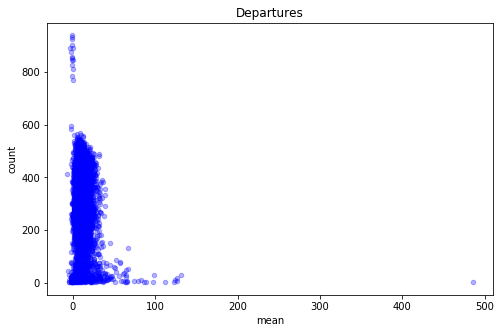

In [158]:
ax_departure = dep_delays_plot.plot.scatter('mean', 'count', figsize=(8,5), color='blue', alpha=0.3)
ax_departure.set_title('Departures')

Text(0.5, 1.0, 'Arrivals')

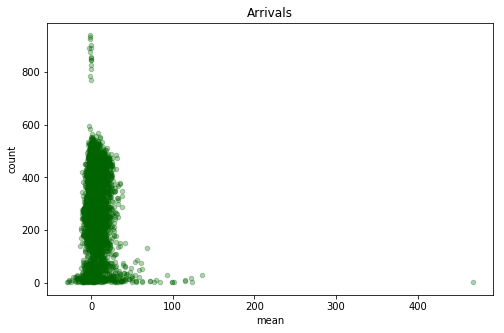

In [159]:
ax_arrival = arr_delays_plot.plot.scatter('mean', 'count', figsize=(8,5), color='Darkgreen', alpha=0.3)
ax_arrival.set_title('Arrivals')

##### Delay Distribution: Departure and Arrival

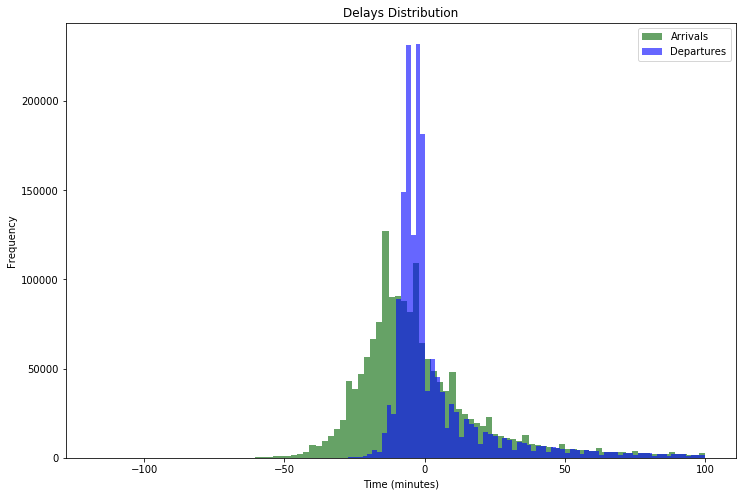

In [155]:
plt.subplots(figsize=(12, 8))

ax1 = plt.hist(df['ArrDelayMin'], range=[min(df['ArrDelayMin']),100], bins=100, color = 'Darkgreen', alpha=0.6)
ax2 = plt.hist(df['DepDelayMin'], range=[min(df['DepDelayMin']),100], bins=100, color = 'blue', alpha=0.6)
plt.legend(['Arrivals', 'Departures'])
plt.title('Delays Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

plt.show()

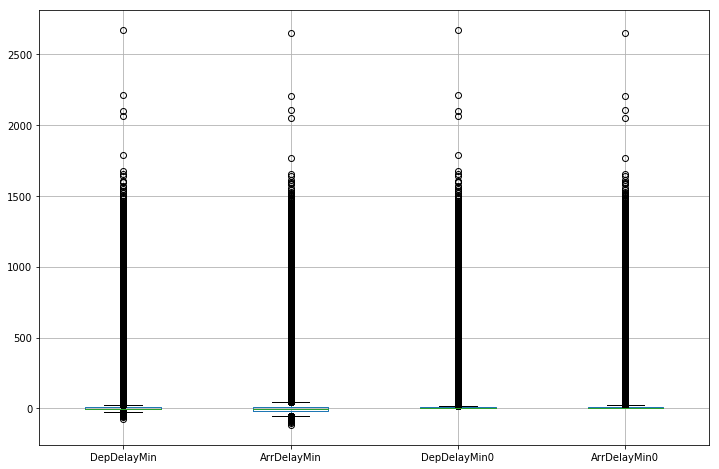

In [156]:
df.boxplot(column=['DepDelayMin', 'ArrDelayMin', 'DepDelayMin0', 'ArrDelayMin0'], figsize=(12,8))

Arrival Delay:

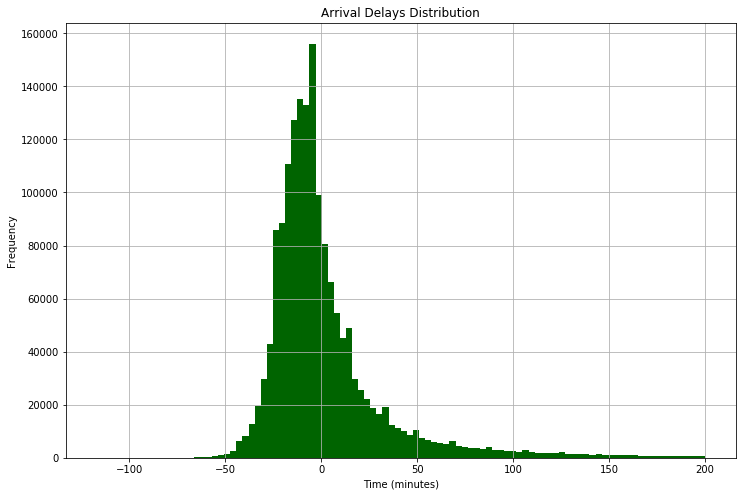

In [100]:
df.hist(column=['ArrDelayMin'], range=[min(df['ArrDelayMin']),200], bins=100, figsize=(12,8),  color = 'Darkgreen')
plt.title('Arrival Delays Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Departure Delay:

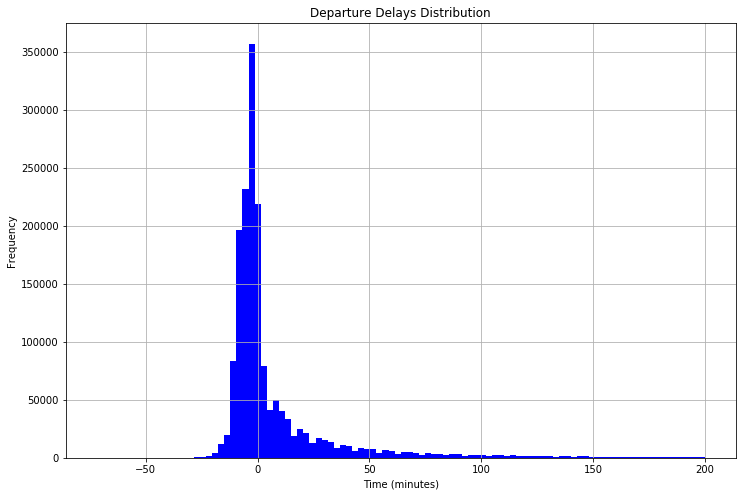

In [101]:
df.hist(column=['DepDelayMin'], range=[min(df['DepDelayMin']),200], bins=100, figsize=(12,8),  color = 'blue')
plt.title('Departure Delays Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Conclusion: The joint distribution shows the Departure and Arrivals Delays, distributions. Focusing only on the delayed flights (values above 0), the distribution is very similar. Is on the negative values (ahead and on-time flights) that the distributions change, representing the 62.09% of all flights. Both distributions show similar values on their 75% percentile: Departure=7.00 and Arrival=9.00, and their maximum delay values, Dep=2672 and Arrival=2649.

### Season Analysis - Contextualitzation

##### Flight Categoritzation: Ahead of time, On Time, Delayed and Cancelled
Calculating Percentages

In [102]:
#Fuction Definition
def ahead_of_time(x):
    return x < 0
def on_time(x):
    return x == 0
def delayed(x):
    return x > 0
def cancelled(x):
    return x is None    

In [103]:
#'Apply' method
df['ahead_of_time'] = df['ArrDelayMin'].apply(ahead_of_time)
df['on_time'] = df['ArrDelayMin'].apply(on_time)
df['delayed'] = df['ArrDelayMin'].apply(delayed)
df['cancelled'] = df['ArrDelayMin'].apply(cancelled)

Instead of defining the function, and than use the 'apply' method I will group both processes into one. We will use the 'lambda' function.

In this process, we are adding 4 new columns to the dataset with: True or False, values.

Also, as in the previous notebook: '01. Data Preparation', we have dropped the column 'CancellationCode', we will indetify the cancelled flights when the 'ArrDelayMin' is null. This statement can be wrong, we will check it when calculating the percentages.

In [104]:
#Optimized Process
df['ahead_of_time'] = df['ArrDelayMin'].apply(lambda x: x < 0)
df['on_time'] = df['ArrDelayMin'].apply(lambda x: x == 0)
df['delayed'] = df['ArrDelayMin'].apply(lambda x: x > 0)
df['cancelled'] = df['ArrDelayMin'].apply(lambda x: x is None) 

In [105]:
#Let's calculate the percentages for each situation. We'll start with delayed flights
df['delayed'].value_counts()

False    1105306
True      605696
Name: delayed, dtype: int64

The result shows that 1105306 flights were not delayed, whereas 605696 were delayed.

In [106]:
#The length of the dataset should be the result of the addition of both delayed and not delayed flights. Let's check it:
delayed = df['delayed'].value_counts()[1] #True = 1
not_delayed = df['delayed'].value_counts()[0] #False = 0
total_flights = delayed + not_delayed
len(df), total_flights

(1711002, 1711002)

Correct! Let's calculate the percentages.

In [107]:
#Delayed Flights
percentage_delayed = (delayed / len(df))*100
percentage_delayed.round(2) #The 'round' function will give us a float with a selected number of decimals, I select 2

35.4

In [108]:
#Ahead of Time
df['ahead_of_time'].value_counts()

True     1030844
False     680158
Name: ahead_of_time, dtype: int64

In [109]:
ahead = df['ahead_of_time'].value_counts()[1]
percentage_ahead_of_time = (ahead / len(df))*100
percentage_ahead_of_time.round(2)

60.25

In [110]:
#On Time
df['on_time'].value_counts()

False    1679528
True       31474
Name: on_time, dtype: int64

In [111]:
on_time = df['on_time'].value_counts()[1]
percentage_on_time = (on_time / len(df))*100
percentage_on_time.round(2)

1.84

In [112]:
#Cancelled
df['cancelled'].value_counts()

False    1711002
Name: cancelled, dtype: int64

As we can see the cancelled column shows no null values, which means our initial statement was wrong. But, as we have the rest of percentages, we can easily calculate the cancelled percentage.

In [113]:
percentage_cancelled = 100-(percentage_ahead_of_time+percentage_delayed+percentage_on_time)
percentage_cancelled.round(2)

2.51

In [114]:
Percentages = {'Flights': ['Ahead of Time','On Time','Delayed','Cancelled'],
                'Percentages':[percentage_ahead_of_time.round(2), percentage_on_time.round(2), 
                               percentage_delayed.round(2), percentage_cancelled.round(2)]}
percentages = DataFrame(Percentages, columns=['Flights', 'Percentages'])
percentages

,Flights,Percentages
0,Ahead of Time,60.25
1,On Time,1.84
2,Delayed,35.40
3,Cancelled,2.51


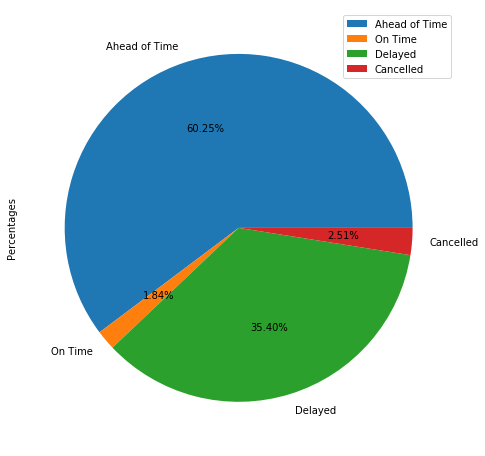

In [115]:
#Let's plot the results obtained
percentages.plot.pie(y='Percentages', labels=percentages['Flights'], autopct = "%.2f%%", figsize=(8,8))

Conclusion: During the winter season of 2018-2019 the 60.25% of flights arrived ahead of time, adding the one-time ones, we have total of 62.09% of the total flights that didn't represent inconvenience to the passenger (delay). But we can also observe that the 35.40% of the flight had some type of delay, or even got cancelled (2.51%).

It is really interesting to see that in amount of percentage the 'Ahead of Time' and 'Delayed' flights, represent the majority of the flights. Whereas, the 'On-Time' flights only represent 1.84% of the total. From this we can rescue that the aviation sector isn't exact on time arrival estimations. Moreover, through this data we can recognize a pattern that airlines use to reduce their rate of delay, divulging higher flight times than real flight times.

Now let's focus on the 'Delayed' flights.

##### Calculating percentage of flights delayed per month

In [116]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime', 'ahead_of_time',
       'on_time', 'delayed', 'cancelled'],
      dtype='object')

In [117]:
season = df.groupby(['Month', 'delayed'])

In [118]:
season.size().unstack()

delayed,False,True
Month,,
1,390791,193194
2,328481,204694
12,386034,207808


In [119]:
total_delayed_flights = df['delayed'].value_counts()[1]
total_delayed_flights

605696

In [120]:
#Number of Delays per month
december_delayed_flights = df[df['Month'] == 12]['delayed'].sum()
january_delayed_flights = df[df['Month'] == 1]['delayed'].sum()
february_delayed_flights = df[df['Month'] == 2]['delayed'].sum()
december_delayed_flights, january_delayed_flights, february_delayed_flights

(207808, 193194, 204694)

In [121]:
#Calculating percentage per month
december_percentage = (december_delayed_flights/total_delayed_flights)*100
january_percentage = (january_delayed_flights/total_delayed_flights)*100
february_percentage =  (february_delayed_flights/total_delayed_flights)*100
#Let's check the results make sense
december_percentage, january_percentage, february_percentage

(34.30896027049874, 31.89619875316991, 33.79484097633136)

In [122]:
Delays_per_month = {'Month': ['December', 'January', 'February'],
                   'Percentages': [december_percentage.round(2), january_percentage.round(2), february_percentage.round(2)]}
Month_percentages = DataFrame(Delays_per_month, columns=['Month','Percentages'])
Month_percentages

,Month,Percentages
0,December,34.31
1,January,31.90
2,February,33.79


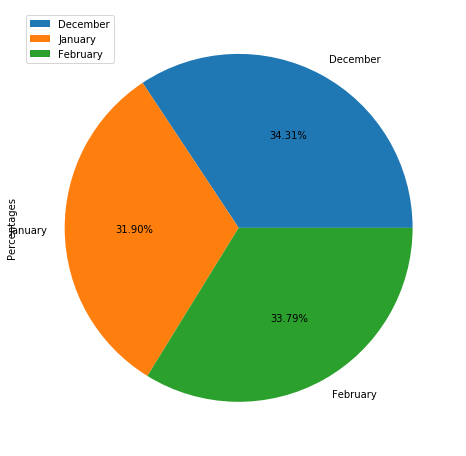

In [123]:
#Let's plot the results obtained
Month_percentages.plot.pie(y='Percentages', labels=Month_percentages['Month'], autopct = "%.2f%%", figsize=(8,8))

Conclusion: The distribution of delayed flights between the three months of the winter season is really equal. December is the month with the most delayed flights (34.31%), February (33.79%),  whereas January is the lowest (31.90%). 

In order to provide more information regarding the timeline analysis, let's go deeper into the analysis.

##### Comparison between Top 20 Days per number of flights delayed and Top 20 per volume of total flights

In [133]:
#Let's check the top 20 days per number of flights delayed
group_by_date_delayed = df.groupby(['FlightDate','delayed'])
top20 = group_by_date_delayed['delayed'].sum().sort_values(ascending=False).head(20)
top20

FlightDate  delayed
2018-12-28  True       11637.0
2018-12-21  True       11158.0
2018-12-27  True       10966.0
2018-12-20  True       10675.0
2019-02-20  True       10308.0
2019-02-22  True        9555.0
2019-02-18  True        9486.0
2019-01-24  True        9401.0
2019-02-21  True        9263.0
2019-01-02  True        9132.0
2018-12-29  True        8868.0
2018-12-14  True        8837.0
2019-02-28  True        8783.0
2019-02-19  True        8747.0
2019-01-21  True        8411.0
2019-02-12  True        8296.0
2019-02-13  True        8244.0
2019-02-11  True        8209.0
2019-02-15  True        8097.0
2019-01-18  True        8007.0
Name: delayed, dtype: float64

In [125]:
#Let's check the top 20 days per volume of flights
group_by_date_top20 = df.groupby(['FlightDate','delayed']).size().unstack().reset_index()
group_by_date_top20['total'] = (group_by_date_top20[False] + group_by_date_top20[True])
group_by_date_top20.sort_values(by=['total'],ascending=False).head(20)

delayed,FlightDate,False,True,total
20,2018-12-21,9856,11158,21014
19,2018-12-20,10272,10675,20947
27,2018-12-28,9093,11637,20730
26,2018-12-27,9751,10966,20717
25,2018-12-26,12732,7856,20588
76,2019-02-15,12464,8097,20561
89,2019-02-28,11763,8783,20546
83,2019-02-22,10976,9555,20531
86,2019-02-25,12573,7912,20485
82,2019-02-21,11217,9263,20480


The top 4 days, regarding the amount of delayed flights belong to December, the month with more delayed flights. Also, these days are close to each other.

##### Comparison per Month between the Arrival Delay Distribution, Top 10 Days per number of flights delayed and Top 10 Days per number of total flights

In [55]:
df[['ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15']].describe()

,ArrDelayMin,ArrDelayMin0,ArrDelay_Ind15,ArrDelayGroup_Int15
count,1.668014e+06,1.668014e+06,1.668014e+06,1.668014e+06
mean,5.321637e+00,1.423746e+01,1.998670e-01,-1.761970e-01
std,5.097335e+01,4.734297e+01,3.999004e-01,2.394602e+00
min,-1.170000e+02,0.000000e+00,0.000000e+00,-2.000000e+00
25%,-1.500000e+01,0.000000e+00,0.000000e+00,-1.000000e+00
50%,-6.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
75%,9.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00
max,2.649000e+03,2.649000e+03,1.000000e+00,1.200000e+01


In [56]:
#We will use the 'sort_values' method to order the dates
dec_18 = df[df['Month'] == 12]['FlightDate'].sort_values(ascending=True) 
jan_19 = df[df['Month'] == 1]['FlightDate'].sort_values(ascending=True) 
feb_19 = df[df['Month'] == 2]['FlightDate'].sort_values(ascending=True) 

December:

In [57]:
#Let's check which is the number of day in the month with the most delayed flights (Top10)
dec_top_delayed = df[df['Month'] == 12].groupby(['DayOfMonth','delayed'])
dec_top_del = dec_top_delayed['delayed'].sum().sort_values(ascending=False).head(10)
dec_top_del

DayOfMonth  delayed
28          True       11637.0
21          True       11158.0
27          True       10966.0
20          True       10675.0
29          True        8868.0
14          True        8837.0
26          True        7856.0
30          True        7758.0
2           True        7310.0
22          True        7189.0
Name: delayed, dtype: float64

In [58]:
#Number of day in the month with the most flights (Top 10)
dec_total_flights_day = df[df['Month'] == 12]['DayOfMonth'].value_counts()
dec_total_flights_day.head(10)

21    21014
20    20947
28    20730
27    20717
26    20588
14    20450
7     20414
13    20373
23    20368
30    20346
Name: DayOfMonth, dtype: int64

In [59]:
#Representation
dec_days = dec_18.unique() 
dec=dec_days.tolist()

In [60]:
december =  df[df['FlightDate'].isin(dec)]
december['FlightDate'].unique()

array(['2018-12-06', '2018-12-07', '2018-12-16', '2018-12-17',
       '2018-12-18', '2018-12-19', '2018-12-29', '2018-12-30',
       '2018-12-31', '2018-12-21', '2018-12-22', '2018-12-10',
       '2018-12-11', '2018-12-12', '2018-12-13', '2018-12-23',
       '2018-12-20', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-01', '2018-12-02',
       '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-08',
       '2018-12-09', '2018-12-14', '2018-12-15'], dtype=object)

In [61]:
december2 = december.groupby(['DayOfMonth'])

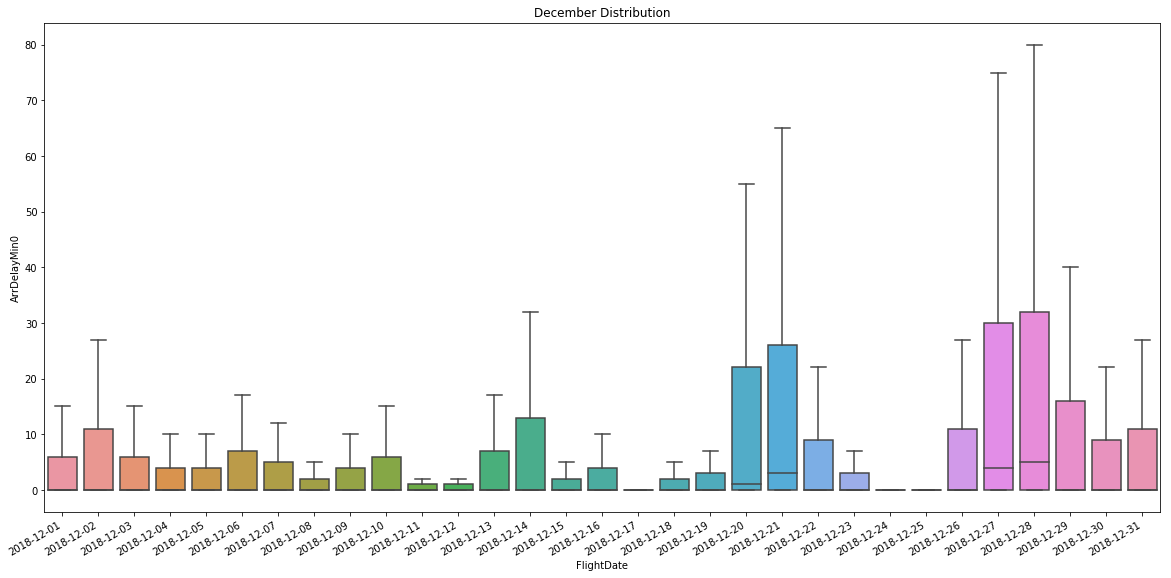

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
sbn.boxplot(dec_18, df['ArrDelayMin0'],ax=ax, showfliers=False).set_title('December Distribution')
fig.autofmt_xdate()

January:

In [63]:
jan_top_delayed = df[df['Month'] == 1].groupby(['DayOfMonth','delayed'])
jan_top_del = jan_top_delayed['delayed'].sum().sort_values(ascending=False).head(10)
jan_top_del

DayOfMonth  delayed
24          True       9401.0
2           True       9132.0
21          True       8411.0
18          True       8007.0
23          True       7924.0
25          True       7752.0
17          True       7672.0
3           True       7066.0
1           True       6891.0
6           True       6844.0
Name: delayed, dtype: float64

In [64]:
jan_total_flights_day = df[df['Month'] == 1]['DayOfMonth'].value_counts()
jan_total_flights_day.head(10)

2     20384
11    20082
25    20041
7     20015
18    20009
10    19980
24    19963
31    19962
17    19960
14    19941
Name: DayOfMonth, dtype: int64

In [65]:
#Representation
jan_days = jan_19.unique() 
jan=jan_days.tolist()
january =  df[df['FlightDate'].isin(dec)]

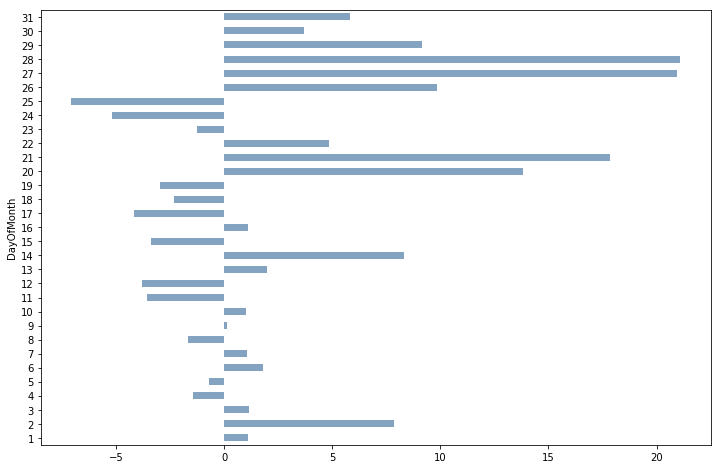

In [66]:
january2 = january.groupby(['DayOfMonth'])
january2['ArrDelayMin'].mean().plot(kind='barh', figsize=(12,8), color=(0.2, 0.4, 0.6, 0.6))

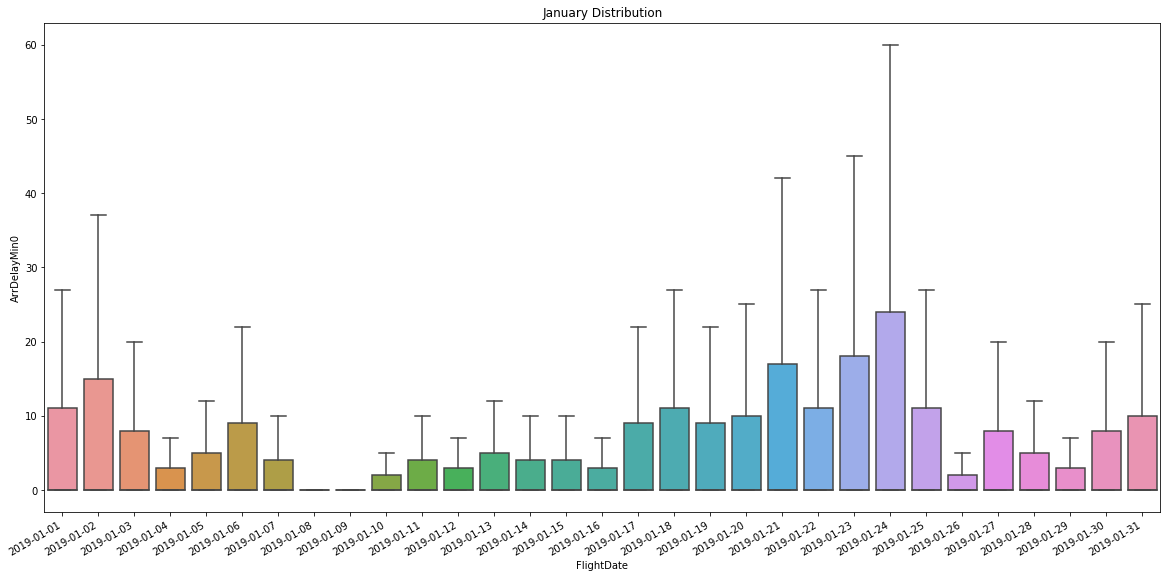

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
sbn.boxplot(jan_19, df['ArrDelayMin0'],ax=ax, showfliers=False).set_title('January Distribution')
fig.autofmt_xdate()

In [68]:
jan_top_delayed = df[df['Month'] == 1].groupby(['DayOfMonth','delayed'])
jan_top_del = jan_top_delayed['delayed'].sum().sort_values(ascending=False).head(10)
jan_top_del

DayOfMonth  delayed
24          True       9401.0
2           True       9132.0
21          True       8411.0
18          True       8007.0
23          True       7924.0
25          True       7752.0
17          True       7672.0
3           True       7066.0
1           True       6891.0
6           True       6844.0
Name: delayed, dtype: float64

In [69]:
jan_total_flights_day = df[df['Month'] == 1]['DayOfMonth'].value_counts()
jan_total_flights_day.head(10)

2     20384
11    20082
25    20041
7     20015
18    20009
10    19980
24    19963
31    19962
17    19960
14    19941
Name: DayOfMonth, dtype: int64

February:

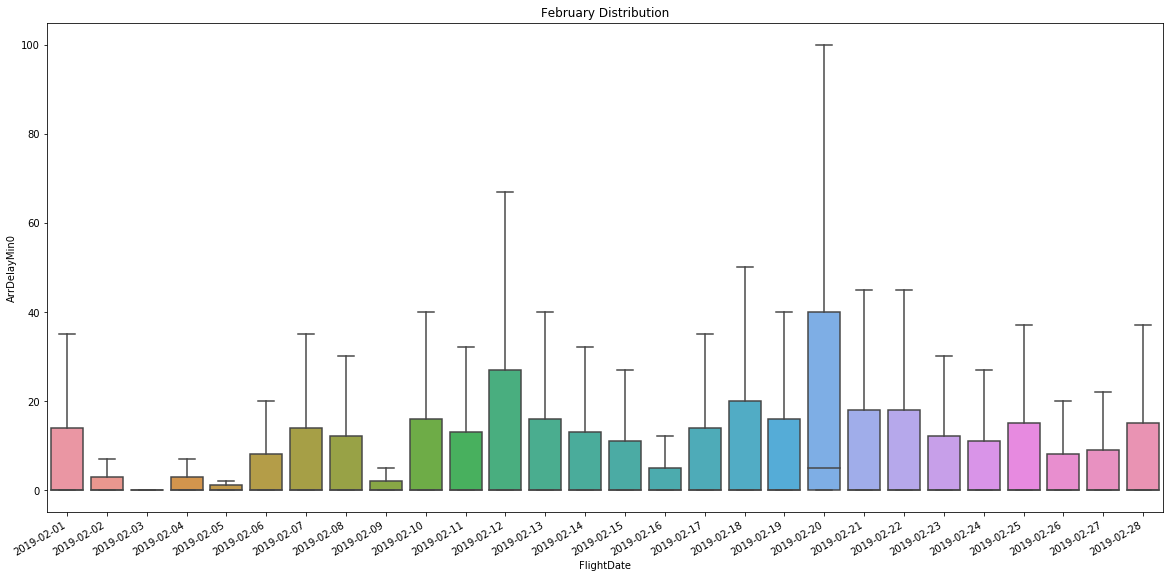

In [70]:
fig, ax = plt.subplots(figsize=(20,10))
sbn.boxplot(feb_19, df['ArrDelayMin0'],ax=ax, showfliers=False).set_title('February Distribution')
fig.autofmt_xdate()

In [71]:
feb_top_delayed = df[df['Month'] == 2].groupby(['DayOfMonth','delayed'])
feb_top_del = feb_top_delayed['delayed'].sum().sort_values(ascending=False).head(10)
feb_top_del

DayOfMonth  delayed
20          True       10308.0
22          True        9555.0
18          True        9486.0
21          True        9263.0
28          True        8783.0
19          True        8747.0
12          True        8296.0
13          True        8244.0
11          True        8209.0
15          True        8097.0
Name: delayed, dtype: float64

In [72]:
feb_total_flights_day = df[df['Month'] == 2]['DayOfMonth'].value_counts()
feb_total_flights_day.head(10)

15    20561
28    20546
22    20531
25    20485
21    20480
14    20416
18    20276
8     20051
1     20045
20    20037
Name: DayOfMonth, dtype: int64

## Air Traffic Congestion Study - Regions / Airports

##### Top 20 States by volume of flights

In [73]:
group_by_state = df.groupby('OriginStateName')

In [74]:
#Top 20 States per volume of flights
group_by_state['OriginStateName'].count().sort_values(ascending=False).head(20)

OriginStateName
California        190120
Texas             183671
Florida           146907
Illinois          101367
Georgia            96275
New York           91996
North Carolina     78706
Virginia           63528
Colorado           63198
Arizona            50398
Michigan           44993
Pennsylvania       42797
Nevada             42629
Minnesota          37631
Washington         34200
Massachusetts      33857
New Jersey         33199
Missouri           31514
Tennessee          30369
Utah               28622
Name: OriginStateName, dtype: int64

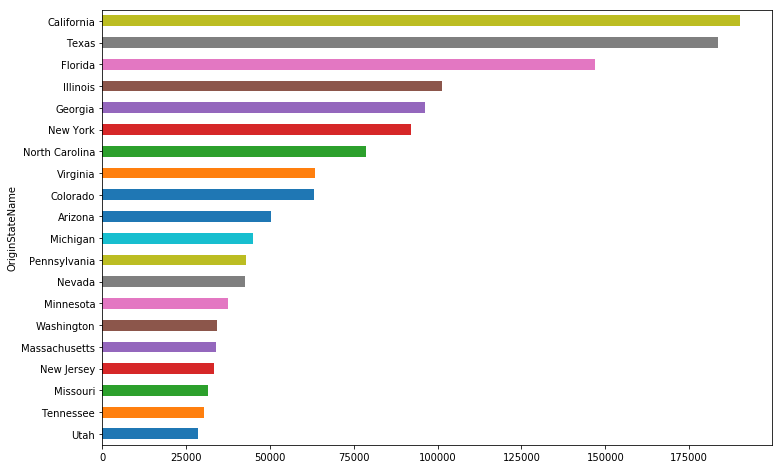

In [183]:
group_by_state['OriginStateName'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

##### Top 20 Cities by volume of flights

In [76]:
#Number of airports per city
count_airports_per_city = df.groupby('OriginCityName')['Origin_IATA'].unique()
count_airports_per_city.map(lambda x: len(x)).sort_values(ascending=False).head(10)

OriginCityName
Columbus, OH      2
Houston, TX       2
New York, NY      2
Phoenix, AZ       2
Chicago, IL       2
Washington, DC    2
Gillette, WY      1
Fort Myers, FL    1
Fort Smith, AR    1
Fort Wayne, IN    1
Name: Origin_IATA, dtype: int64

In [77]:
group_by_city = df.groupby(['OriginCityName', 'OriginStateName'])

In [78]:
#Top 20 cities per volume of flights
group_by_city['OriginCityName'].count().sort_values(ascending=False).head(20)

OriginCityName         OriginStateName
Chicago, IL            Illinois           96861
Atlanta, GA            Georgia            90778
New York, NY           New York           71144
Dallas/Fort Worth, TX  Texas              67089
Houston, TX            Texas              57330
Charlotte, NC          North Carolina     55326
Denver, CO             Colorado           54214
Los Angeles, CA        California         52634
Washington, DC         Virginia           49691
Phoenix, AZ            Arizona            44499
San Francisco, CA      California         40249
Las Vegas, NV          Nevada             37896
Detroit, MI            Michigan           35720
Minneapolis, MN        Minnesota          35519
Orlando, FL            Florida            35373
Boston, MA             Massachusetts      33587
Newark, NJ             New Jersey         31748
Seattle, WA            Washington         30331
Philadelphia, PA       Pennsylvania       27143
Salt Lake City, UT     Utah               27110
N

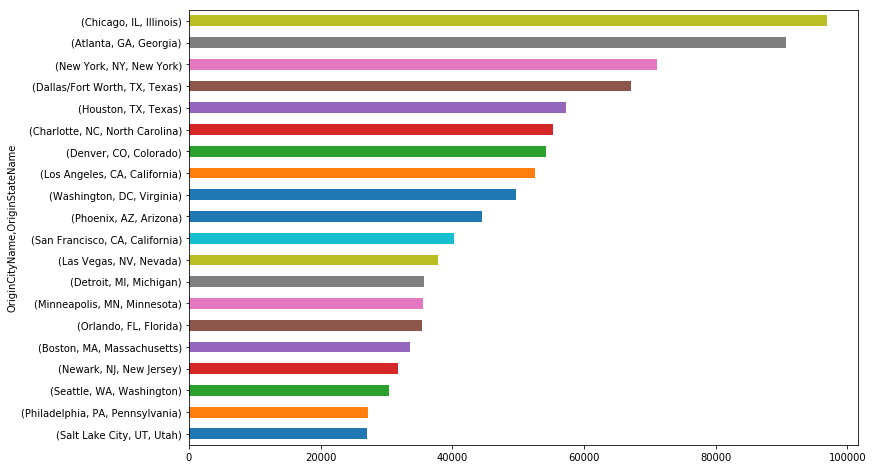

In [79]:
group_by_city['OriginCityName'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

Conclusion (States and Cities): The top 20 states by number of flights indicates that most of the air traffic is located on the center and eastern part of the country. The States that appear on the top 20, that are not included in this area, such as: California or Texas, concentrate the air traffic in one major (or two) major Hub airports

##### Top 20 airports by volume of flights

In [80]:
group_by_airport = df.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [81]:
#How many airports are contemplated in the dataset?
group_by_airport['Origin_IATA'].unique().count()

346

In [184]:
#Top 20 airports per volume of flights
group_by_airport['Origin_IATA'].count().sort_values(ascending=False).head(10)

Origin_IATA  OriginCityName         OriginStateName
ATL          Atlanta, GA            Georgia            90778
ORD          Chicago, IL            Illinois           77774
DFW          Dallas/Fort Worth, TX  Texas              67089
CLT          Charlotte, NC          North Carolina     55326
DEN          Denver, CO             Colorado           54214
LAX          Los Angeles, CA        California         52634
PHX          Phoenix, AZ            Arizona            43083
IAH          Houston, TX            Texas              42845
SFO          San Francisco, CA      California         40249
LGA          New York, NY           New York           40223
Name: Origin_IATA, dtype: int64

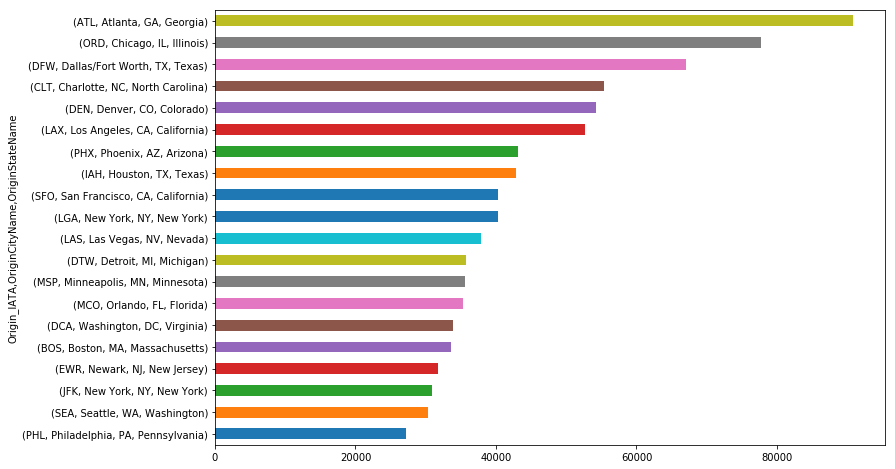

In [181]:
group_by_airport['Origin_IATA'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

Conclusion: The top 10 airports by volume of flights, don’t follow a geographical pattern, whereas between the top 10 and top 20, the majority of the airports belong to the pattern shown on the State and City layers; indicating that the top 10 airports represent the major Hubs in each region.